<a href="https://colab.research.google.com/github/MrunaliShigawan/SatelliteImageProcessing/blob/master/Unet_Model_testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:91: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("co...)`


Model: "model_10"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_10 (InputLayer)           (None, None, None, 4 0                                            
__________________________________________________________________________________________________
conv2d_217 (Conv2D)             (None, None, None, 6 2368        input_10[0][0]                   
__________________________________________________________________________________________________
conv2d_218 (Conv2D)             (None, None, None, 6 36928       conv2d_217[0][0]                 
__________________________________________________________________________________________________
batch_normalization_82 (BatchNo (None, None, None, 6 256         conv2d_218[0][0]                 
___________________________________________________________________________________________

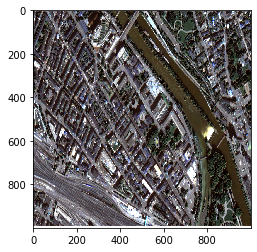

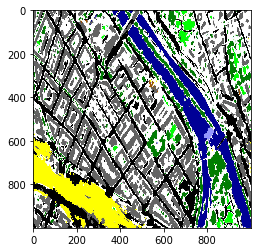

(1000, 1000, 4)
Generated 20 patches
Images were read


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:281: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


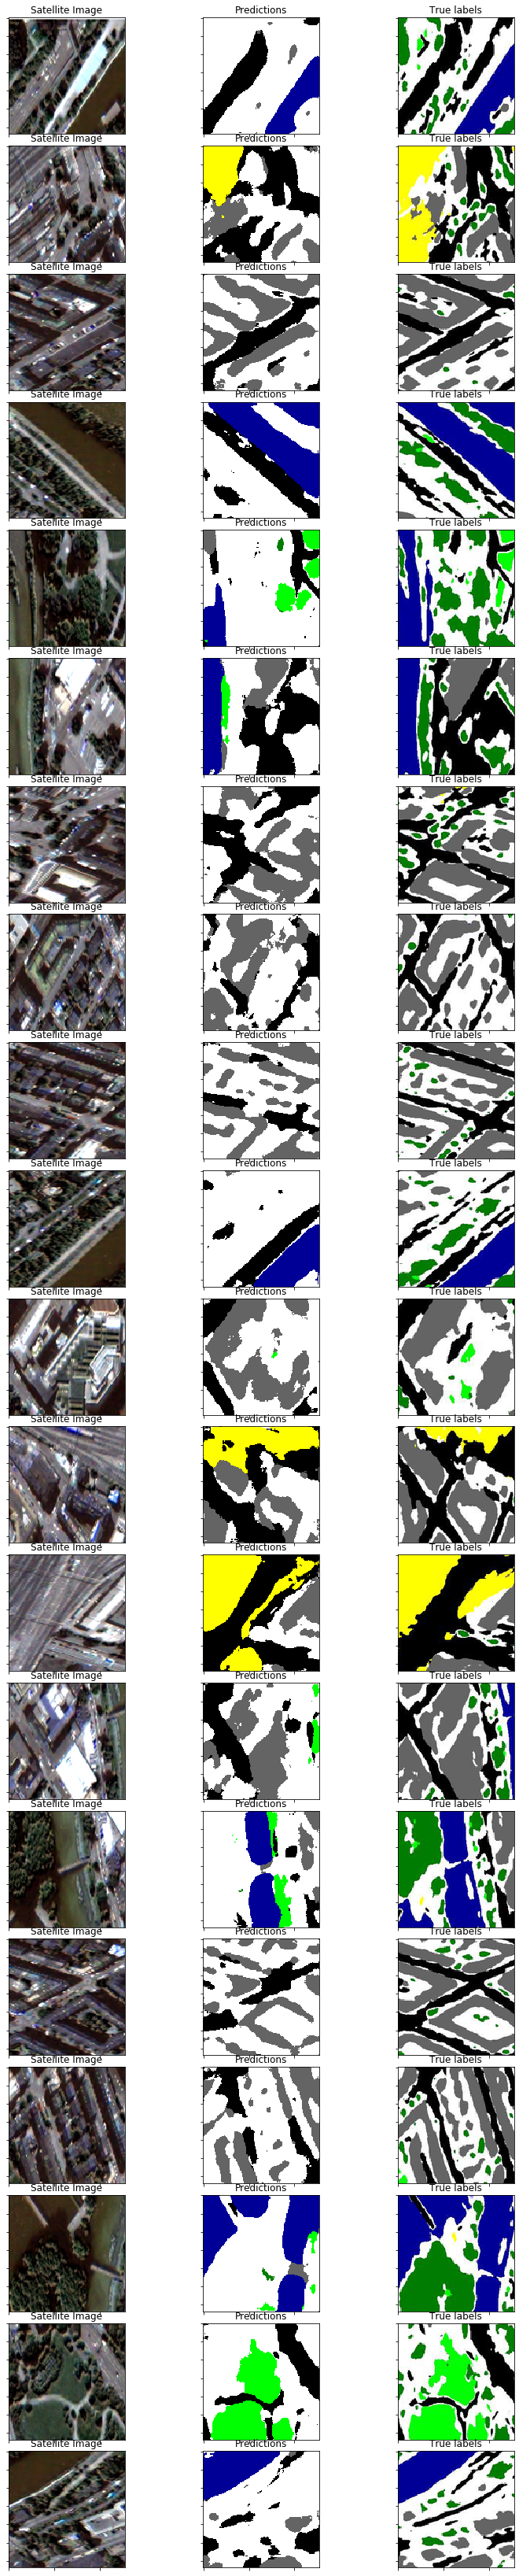

In [ ]:
# -*- coding: utf-8 -*-
"""
Created on Sun Dec  8 13:02:31 2019

@author: lenovo
"""
import PIL
from PIL import Image
import random
import numpy as np
from keras import backend as K
import numpy as np
from keras.callbacks import CSVLogger
from keras.callbacks import TensorBoard
from keras.callbacks import ModelCheckpoint
from keras.models import *
from keras.layers import *
from keras.optimizers import *
import matplotlib.pyplot as plt

color_dict = {0: (0, 0, 0),
              1: (0, 125, 0),
              2: (150, 80, 0),
              3: (255, 255, 0),
              4: (100, 100, 100),
              5: (0, 255, 0),
              6: (0, 0, 150),
              7: (150, 150, 255),
              8: (255, 255, 255)}

weights_file = "/content/drive/My Drive/unet_weights.h5"

def UNet(shape = (None,None,4)):
    
    # Left side of the U-Net
    inputs = Input(shape)
#    in_shape = inputs.shape
#    print(in_shape)
    conv1 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'random_normal')(inputs)
    conv1 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'random_normal')(conv1)
    conv1 = BatchNormalization()(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
    conv2 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'random_normal')(pool1)
    conv2 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'random_normal')(conv2)
    conv2 = BatchNormalization()(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
    conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'random_normal')(pool2)
    conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'random_normal')(conv3)
    conv3 = BatchNormalization()(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)
    conv4 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'random_normal')(pool3)
    conv4 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'random_normal')(conv4)
    conv4 = BatchNormalization()(conv4)
    drop4 = Dropout(0.5)(conv4)
    pool4 = MaxPooling2D(pool_size=(2, 2))(drop4)
    
    # Bottom of the U-Net
    conv5 = Conv2D(1024, 3, activation = 'relu', padding = 'same', kernel_initializer = 'random_normal')(pool4)
    conv5 = Conv2D(1024, 3, activation = 'relu', padding = 'same', kernel_initializer = 'random_normal')(conv5)
    conv5 = BatchNormalization()(conv5)
    drop5 = Dropout(0.5)(conv5)
    
    # Upsampling Starts, right side of the U-Net
    up6 = Conv2D(512, 2, activation = 'relu', padding = 'same', kernel_initializer = 'random_normal')(UpSampling2D(size = (2,2))(drop5))
    merge6 = concatenate([drop4,up6], axis = 3)
    conv6 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'random_normal')(merge6)
    conv6 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'random_normal')(conv6)
    conv6 = BatchNormalization()(conv6)

    up7 = Conv2D(256, 2, activation = 'relu', padding = 'same', kernel_initializer = 'random_normal')(UpSampling2D(size = (2,2))(conv6))
    merge7 = concatenate([conv3,up7], axis = 3)
    conv7 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'random_normal')(merge7)
    conv7 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'random_normal')(conv7)
    conv7 = BatchNormalization()(conv7)

    up8 = Conv2D(128, 2, activation = 'relu', padding = 'same', kernel_initializer = 'random_normal')(UpSampling2D(size = (2,2))(conv7))
    merge8 = concatenate([conv2,up8], axis = 3)
    conv8 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'random_normal')(merge8)
    conv8 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'random_normal')(conv8)
    conv8 = BatchNormalization()(conv8)

    up9 = Conv2D(64, 2, activation = 'relu', padding = 'same', kernel_initializer = 'random_normal')(UpSampling2D(size = (2,2))(conv8))
    merge9 = concatenate([conv1,up9], axis = 3)
    conv9 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'random_normal')(merge9)
    conv9 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'random_normal')(conv9)
    conv9 = Conv2D(16, 3, activation = 'relu', padding = 'same', kernel_initializer = 'random_normal')(conv9)
    conv9 = BatchNormalization()(conv9)

    # Output layer of the U-Net with a softmax activation
    conv10 = Conv2D(9, 1, activation = 'softmax')(conv9)

    model = Model(input = inputs, output = conv10)

    model.compile(optimizer = Adam(lr = 0.0001), loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    model.summary()
    
    return model 
model = UNet()


def get_rand_patch(img, true, sz=128):
    """
    :param img: ndarray with shape (x_sz, y_sz, num_channels)
    :param mask: binary ndarray with shape (x_sz, y_sz, num_classes)
    :param sz: size of random patch
    :return: patch with shape (sz, sz, num_channels)
    """
    #assert len(img.shape) == 3 and img.shape[0] > sz and img.shape[1] > sz and img.shape[0:2] == mask.shape[0:2]
    #print(img.shape)
    #print(true.shape)
    xc = random.randint(0, img.shape[0] - sz)
    yc = random.randint(0, img.shape[1] - sz)
    #xc1 = random.randint(0, mask.shape[0] - sz)
    #yc1 = random.randint(0, mask.shape[1] - sz)
    patch_img = img[xc:(xc + sz), yc:(yc + sz)]
    #patch_mask = mask[xc:(xc + sz), yc:(yc + sz)]
    patch_true = true[xc:(xc + sz), yc:(yc + sz)]
    # Apply some random transformations
    random_transformation = np.random.randint(1,8)
    if random_transformation == 1:  # reverse first dimension
        patch_img = patch_img[::-1,:,:]
        #patch_mask = patch_mask[::-1,:,:]
        patch_true = patch_true[::-1,:,:]
    elif random_transformation == 2:    # reverse second dimension
        patch_img = patch_img[:,::-1,:]
        #patch_mask = patch_mask[:,::-1,:]
        patch_true = patch_true[:,::-1,:]
    elif random_transformation == 3:    # transpose(interchange) first and second dimensions
        patch_img = patch_img.transpose([1,0,2])
        #patch_mask = patch_mask.transpose([1,0,2])
        patch_true = patch_true.transpose([1,0,2])
    elif random_transformation == 4:
        patch_img = np.rot90(patch_img, 1)
       # patch_mask = np.rot90(patch_mask, 1)
        patch_true = np.rot90(patch_true, 1)
    elif random_transformation == 5:
        patch_img = np.rot90(patch_img, 2)
        #patch_mask = np.rot90(patch_mask, 2)
        patch_true = np.rot90(patch_true, 2)
    elif random_transformation == 6:
        patch_img = np.rot90(patch_img, 3)
        #patch_mask = np.rot90(patch_mask, 3)
        patch_true = np.rot90(patch_true, 3)
    else:
        pass

    return patch_img, patch_true


def get_patches(img, true, n_patches, sz=128,img_id=1):
    x = list()
    y = list()
    
    total_patches = 0
    while total_patches < n_patches:
        img_patch,  true_patch = get_rand_patch(img, true, sz)
        x.append(img_patch)
        y.append(true_patch)
        total_patches += 1
    print('Generated {} patches'.format(total_patches))
    return np.array(x), np.array(y)

def rgb_to_onehot(rgb_arr, color_dict):
    num_classes = len(color_dict)
    shape = rgb_arr.shape[:2]+(num_classes,)
    #print(shape)
    arr = np.zeros( shape, dtype=np.int8 )
    for i, cls in enumerate(color_dict):
        arr[:,:,i] = np.all(rgb_arr.reshape( (-1,3) ) == color_dict[i], axis=1).reshape(shape[:2])
    return arr

def onehot_to_rgb(onehot, color_dict):
    single_layer = np.argmax(onehot, axis=-1)
    output = np.zeros( onehot.shape[:2]+(3,) )
    for k in color_dict.keys():
        output[single_layer==k] = color_dict[k]
    return np.uint8(output)


img_id=2
print('Reading images')
img = Image.open('/content/drive/My Drive/train_img/0{}.png'.format(img_id))
img=img.resize((1000,1000), PIL.Image.ANTIALIAS)
true = Image.open('/content/drive/My Drive/train_mask/0{}.jpg'.format(img_id))
true=true.resize((1000,1000), PIL.Image.ANTIALIAS)
plt.imshow(img)
plt.show()
plt.imshow(true)
plt.show()
true = np.array(true)
img = np.array(img)
print(img.shape)
#img_m = Image.open('./data/sat/{}.png'.format(img_id))
#img_m = np.array(img_m)
#print (img_m.shape)
#img_m = tiff.imread('./sat_test/0{}.tif'.format(img_id))
#img = Image.open('./images/0{}.png'.format(img_id))
#mask = resizeimage.resize_contain(img_m, [img_m.shape[0], img_m.shape[1]])
#true=Image.open('./predictions/0{}.jpg'.format(img_id))
#img=img.resize((img_m.shape[1],img_m.shape[0]), PIL.Image.ANTIALIAS)

x_train,  y_true = get_patches(img,true, n_patches=20, sz=128)

print('Images were read')
#f, axarr = plt.subplots(len(x_train),3,figsize=(50, 50))
#f.subplots_adjust(hspace=0.1, wspace=0.1)
#plt.tight_layout()
#axarr.set_xticklabels([])
#axarr.set_yticklabels([])
#axarr.set_xticks([])
#axarr.set_yticks([])
from matplotlib import gridspec
fig = plt.figure(figsize=(50, 50)) 
gs = gridspec.GridSpec(len(x_train), 3, width_ratios=[1, 1, 1],wspace=0.1, hspace=0.1, top=0.95, bottom=0.05, left=0.0, right=0.2) 
n=0
model.load_weights(weights_file)
for i_ in range(len(x_train)):
    
    item = x_train[i_]
    
    h,w,c = item.shape
    
    item = np.reshape(item,(1,h,w,c))
        
    y_pred_test_img = model.predict(item)
    
    ba,h,w,c = y_pred_test_img.shape
    
    
    y_pred_test_img = np.reshape(y_pred_test_img,(h,w,c))
    #img=np.uint8(y_pred_test_img)
    img = y_pred_test_img
    h, w, c = img.shape
    for i in range(h):
        for j in range(w):
                
            argmax_index = np.argmax(img[i,j])
                
            sudo_onehot_arr = np.zeros((9))
                
            sudo_onehot_arr[argmax_index] = 1
                
            onehot_encode = sudo_onehot_arr
                
            img[i,j,:] = onehot_encode
    y_pred_test_img = onehot_to_rgb(img, color_dict)
    
    imx = Image.fromarray(y_pred_test_img)
    #plt.subplot(gs[n])
    #plt.imshow(imx)
    ax= plt.subplot(gs[i_,1])
    ax.imshow(imx)
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    plt.title("Predictions")
    #axarr[i_,0].imshow(imx)
    #imx.save("test_output/"+str(i_+1)+".jpg")
    
    imx = Image.fromarray(x_train[i_])
    #axarr[i_,1].imshow(imx)
    #plt.subplot(gs[n])
    #plt.imshow(imx)
    ax= plt.subplot(gs[i_,0])
    ax.imshow(imx)
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    plt.title("Satellite Image")
    #imx.save("test_input/"+str(i_+1)+".png")
    
    imx = Image.fromarray(y_true[i_])
    #axarr[i_,2].imshow(imx)
    #plt.subplot(gs[n])
    #plt.imshow(imx)
    ax= plt.subplot(gs[i_,2])
    ax.imshow(imx)
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    plt.title("True labels")
    #imx.save("test_true/"+str(i_+1)+".jpg")
    
plt.tight_layout()
plt.savefig('grid_figure.pdf')